In [1]:
'''
Pressure measurement of electrohydraulic pump
'''

import time
from os import walk
import os.path as ospa
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd

# %matplotlib notebook
# %matplotlib notebook
plt.rcParams.update({'font.size': 14})

Fs = 1000

# dataPath = ".\Data0908 Sealed with Hot Glue"
dataPath = ".\Data0923 Tube8mm"

calib = np.loadtxt('Calibration20210802.txt')
print("Calibration line a = %.16f, b = %.16f" % (calib[0],calib[1]))

Calibration line a = 0.0497649079931161, b = 0.1217075926746309


In [2]:
'''
General Functions
'''

def aPlot(figName, is3D = False):
    ax = []
    
    fig1 = plt.figure(figsize = (14,4))
    fig1.suptitle(figName, fontsize=16)
    if(is3D):
        ax = fig1.add_subplot(111, projection='3d')
    else:
        ax = fig1.add_subplot(111)
        
    return ax

.\Data0923 Tube8mm - Condition: 
Tube8mmU7100V
trial01, mean-pres. = 0.102 bar, max-pres. = 0.176 bar (length = 12000)
.\Data0923 Tube8mm - Condition: 
Tube8mmU7100V
trial02, mean-pres. = 0.106 bar, max-pres. = 0.172 bar (length = 12000)
.\Data0923 Tube8mm - Condition: 
Tube8mmU7kV
trial03, mean-pres. = 0.031 bar, max-pres. = 0.060 bar (length = 12000)
.\Data0923 Tube8mm - Condition: 
Tube8mmU6900V
trial04, mean-pres. = 0.066 bar, max-pres. = 0.145 bar (length = 12000)
.\Data0923 Tube8mm - Condition: 
Tube8mmU6900V
trial05, mean-pres. = 0.064 bar, max-pres. = 0.140 bar (length = 14000)
.\Data0923 Tube8mm - Condition: 
Tube8mmU6900V
trial06, mean-pres. = 0.036 bar, max-pres. = 0.069 bar (length = 14000)


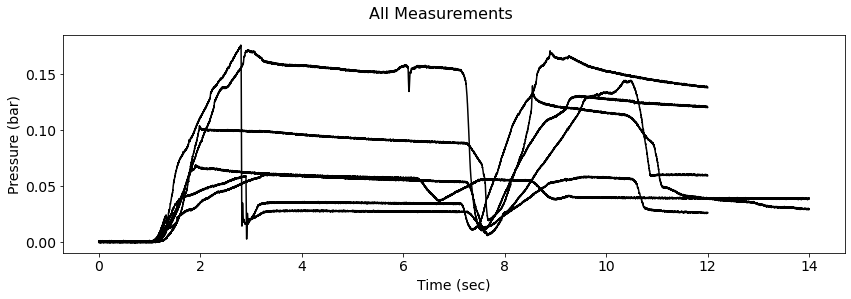

In [3]:
'''
Import data from csv files
'''

ax = aPlot('All Measurements')

presData = []
for root, directories, files in walk(dataPath):
    for fileName in files:
        condi = re.split('_|\.csv', fileName)[3:5]
        names = condi[0]
        
        trialNum = int(re.split('t', condi[1])[-1])
        
        data = np.genfromtxt(ospa.join(root, fileName), delimiter=',')
        
        dataLen = len(data[:,0])
        
        ax.plot(np.arange(dataLen)/Fs, (data[:,1]-calib[1])*calib[0], color = 'k')       
        
        meanVoltage = np.mean(data[int(dataLen/2):,1]) - data[0,1]     
        meanPressure = (meanVoltage-calib[1])*calib[0]
        
        maxVoltage = np.max(data[:,1]) - np.min(data[:,1]);
        maxPressure = maxVoltage*calib[0]
        
        print("%s - Condition: " % root)
        print(names)
        print("trial%02d, mean-pres. = %.3f bar, max-pres. = %.3f bar (length = %d)" % 
              (trialNum, meanPressure, maxPressure, dataLen))

#######         if(trialNum > 0 and trialNum < 6):
        presData.append([names, trialNum, meanPressure, maxPressure])
        
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Pressure (bar)')
        
presData = pd.DataFrame(presData, columns = ['Condition','Trial','MeanPressure','MaxPressure'])


In [4]:
################## presData = pd.read_csv('MergedProsssed0719and0728.csv'); presData.head()

In [5]:
condiNames = pd.unique(presData['Condition'])
condiNum = len(condiNames)
print("In total %d conditions: %s" % (condiNum, condiNames))

################## condiNames = condiNames[[4,5,0,1,2,3,7,8,15,16,9,11,12,10,6,13,14]]

In total 3 conditions: ['Tube8mmU7100V' 'Tube8mmU7kV' 'Tube8mmU6900V']


In [6]:
# select_ind = (presData['Trial'] > 0) & (presData['Trial'] < 6) 
select_ind = (presData['Trial'] > 0)
# for condi in condiNames:
#     condiAvgMax = np.mean(presData.loc[(presData['Condition'] == condi) & select_ind, 'MaxPressure'])
#     print("%s - avg. max pressure = %.3f bar" % (condi, condiAvgMax))
# print("-------------------------------------")

for condi in condiNames:
    condiMaxMax = np.max(presData.loc[presData['Condition'] == condi, 'MaxPressure'])
    print("%s - max pressure = %.3f bar" % (condi, condiMaxMax))

Tube8mmU7100V - max pressure = 0.176 bar
Tube8mmU7kV - max pressure = 0.060 bar
Tube8mmU6900V - max pressure = 0.145 bar


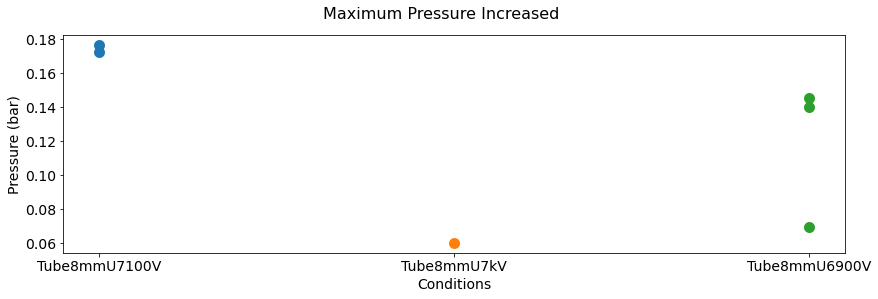

In [7]:
# select_ind = (presData['Trial'] > 0) & (presData['Trial'] < 6) 
select_ind = (presData['Trial'] > 0)

ax = aPlot('Maximum Pressure Increased')
for i in range(condiNum):
    temp = presData.loc[(presData['Condition'] == condiNames[i]) & select_ind, 'MaxPressure']
    ax.scatter(i*np.ones(temp.size), temp, linewidths = 5)
ax.set_xticks(range(condiNum))
ax.set_xticklabels(condiNames, rotation=0)
ax.set_xlabel('Conditions')
ax.set_ylabel('Pressure (bar)')
plt.show()

In [8]:
# ax = aPlot('Mean Pressure (over the last 2.5-second duration)')
# for i in range(condiNum):
#     temp = presData.loc[presData['Condition'] == condiNames[i], 'MeanPressure']
#     ax.scatter(i*np.ones(temp.size), temp, linewidths = 5)
# ax.set_xticks(range(condiNum))
# ax.set_xticklabels(condiNames, rotation=30)
# ax.set_xlabel('Conditions')
# ax.set_ylabel('Pressure (bar)')
# plt.show()

In [9]:
############# presData0719 = presData
############# condiNames0719 = condiNames
############# presData = np.concatenate((presData0719, presData), axis = 0)
############# condiNames = np.concatenate((condiNames0719, condiNames), axis = 0)
############# np.savetxt("MergedProsssed0719and0728.csv", presData, fmt = '%s,%d,%.16f,%.16f', 
#############            header = 'Condition,Trial,MeanPressure,MaxPressure', comments='')
############# np.savetxt("MergedProsssed0719and0728_CondiNames.csv", condiNames, fmt = '%s')